
$$
f(\boldsymbol{y}) = 2\phi_p(\boldsymbol{y}\vert\boldsymbol{\mu},\boldsymbol{\Sigma})\Phi_1\left(\boldsymbol{\lambda}^T\boldsymbol{\Sigma}^{-1/2}(\boldsymbol{y}-\boldsymbol{\mu})\right), \hspace{0.3cm}\text{for }\boldsymbol{y}\in\mathbb{R}^d,
$$

where $\boldsymbol{\mu}\in\mathbb{R}^d$, $\boldsymbol{\lambda}\in\mathbb{R}^d$, and $\boldsymbol{\Sigma}\in\mathbb{R}^{d\times d}$. The marginal stochastic representation is given by

$$
\boldsymbol{Y}\stackrel{d}{=}\boldsymbol{\mu}+\boldsymbol{\Sigma}^{1/2}\left(\boldsymbol{\delta}\vert T_0\vert + \left(\mathbb{I}_p-\boldsymbol{\delta}\boldsymbol{\delta}^T\right)^{1/2}T_1\right)
$$

where $T_0\sim N_1(0,1)$ and $T_1\sim N_p(0, \mathbb{I}_p)$ independently and $\boldsymbol{\delta} = \boldsymbol{\lambda}/\sqrt{1+\boldsymbol{\delta}^T\boldsymbol{\delta}}$. It follows that

$$\mathbb{E}(\boldsymbol{Y}) = \boldsymbol{\mu} + \sqrt{\frac{2}{\pi}}\boldsymbol{\Sigma}^{1/2}\boldsymbol{\delta}$$

$$\text{Var}(\boldsymbol{Y})=\boldsymbol{\Sigma}-\frac{2}{\pi}\boldsymbol{\Sigma}^{1/2}\boldsymbol{\delta}\boldsymbol{\delta}^T\boldsymbol{\Sigma}^{1/2}$$

Let $A = \boldsymbol{\lambda}^T\boldsymbol{\Sigma}^{-1/2}(\boldsymbol{y}-\boldsymbol{\mu})$ and $W_{\Phi_1(x)}=\phi_1(x)/\Phi_1(x)$ for $x\in\mathbb{R}$. We get

$$\mathbb{E}[U^r\vert\boldsymbol{y}]=\frac{2}{f(\boldsymbol{y})}\phi_p(\boldsymbol{y}\vert\boldsymbol{\mu},\boldsymbol{\Sigma})\Phi_1(A)$$

$$\mathbb{E}[U^rW_{\Phi_1}\left(U^{1/2}A\right)] = \frac{2}{f(\boldsymbol{y})}\phi_p(\boldsymbol{y}\vert\boldsymbol{\mu},\boldsymbol{\Sigma})\phi_1(A)$$

In [ ]:
# file:///C:/Users/875075/Downloads/11234-Texto%20del%20art%C3%ADculo-44622-1-10-20141217.pdf

Define $\boldsymbol{\Delta}:=\boldsymbol{\Sigma}^{1/2}\boldsymbol{\delta}$ and $\boldsymbol{\Gamma}:=\boldsymbol{\Sigma}-\boldsymbol{\Delta}\boldsymbol{\Delta}^T$. It follows that

$$l(\boldsymbol{\theta}\vert\boldsymbol{y},\boldsymbol{u},\boldsymbol{t})=c-\frac{n}{2}\log\vert\boldsymbol{\Gamma}\vert-\frac{1}{2}\sum_{i=1}^n u_i(\boldsymbol{y}_i-\boldsymbol{\mu}-\boldsymbol{\Delta}t_i)^T\boldsymbol{\Gamma}^{-1}(\boldsymbol{y}_i-\boldsymbol{\mu}-\boldsymbol{\Delta}t_i),$$

where $c$ is a constant independent of the parameter vector $\boldsymbol{\theta}$

In [46]:
import numpy as np
import scipy.stats
import scipy

In [53]:
d = 2
n = 1000

y = scipy.stats.multivariate_normal.rvs(np.ones((d)), np.eye(d), n)

In [58]:
mu = np.ones((d, 1))
Sigma = np.eye(d)
lmbda = np.zeros((d, 1))
delta = lmbda / np.sqrt(1 + lmbda.T @ lmbda)
Delta = np.sqrt(Sigma) @ delta
Gamma = Sigma - Delta @ Delta.T

In [61]:
def _delta(lmbda):
    return lmbda / np.sqrt(1 + lmbda.T @ lmbda)

def mean(mu, lmbda, Sigma):
    return mu + np.sqrt(2/np.pi) * np.sqrt(Sigma) @ _delta(lmbda)

def var(mu, lmbda, Sigma):
    delta = _delta(lmbda)
    sqrtS = np.sqrt(Sigma)
    return Sigma - (2/np.pi) * sqrtS @ delta @ delta.T @ sqrtS

In [69]:
M2 = 1 / (1 + Delta.T @ np.linalg.inv(Gamma) @ Delta)
M  = np.sqrt(M2)
muT = M2 * Delta.T @ np.linalg.inv(Gamma) @ (y.T - mu)

A = lmbda.T @ np.linalg.inv(np.sqrt(Sigma)) @ (y.T - mu)
tau = scipy.stats.norm.pdf(A) / scipy.stats.norm.cdf(A)

E_t = muT + M * tau
E_t2 = muT**2 + M2 + M * muT * tau

In [115]:
mu_k = (y - E_t.T * Delta.T) / n

In [117]:
dev = y - mu_k

In [124]:
#np.mean(dev * dev, axis = 0)

In [136]:
Delta_k = (np.mean(E_t.T * dev, axis = 0) / np.mean(E_t))[:, None]

In [141]:
delta @ delta.T * np.mean(E_t)

array([[0., 0.],
       [0., 0.]])

0.7978845608028654

In [123]:
E_t

array([[0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79788456, 0.79788456,
        0.79788456, 0.79788456, 0.79788456, 0.79

array([[-0.49868945, -0.86672271,  0.91511943, ..., -1.92150824,
         0.31121847,  1.05051564],
       [-0.87616447, -0.21941804, -0.07310721, ...,  0.2380173 ,
         1.51918009, -0.38885228]])

In [34]:
n = 1000
d = 2

mu = np.ones((d, 1))
lmbda = np.ones((d, 1))
Sigma = np.eye(d)
delta = lmbda / np.sqrt(1 + lmbda.T @ lmbda)

In [45]:
delta

array([[0.57735027],
       [0.57735027]])

In [13]:
Delta = np.ones((2, 1))
Gamma = np.eye(2)

In [17]:
Sigma = Gamma + Delta @ Delta.T
lmbda = np.linalg.inv(np.sqrt(Sigma)) @ Delta / np.sqrt(1 - Delta.T @ np.linalg.inv(Sigma) @ Delta)

array([[0.57735027]])

In [12]:
np.eye(2) @ np.ones((2,1))

array([[1.],
       [1.]])

In [11]:
delta.T @ np.linalg.inv(sigma) @ delta

array([[0.5, 0. ],
       [0. , 0.5]])

In [ ]:
def logpdf(x, a, loc, scale):    
    a, loc, scale = check_params(a, loc, scale)
    
    x    = mvn._process_quantiles(x, len(a))
    pdf  = mvn(loc.flatten(), scale).logpdf(x)
    cdf  = norm(0, 1).logcdf(np.dot(x, a.flatten()))
    return _squeeze_output(np.log(2) + pdf + cdf)

def pdf(x, a, loc, scale):
    return np.exp(logpdf(x, a, loc, scale))


# Multivariate Skew Normal Distribution

**Density**: The probability density function of the multivariate skew normal distribution is given by

$$f(\boldsymbol{x})=2\phi_K(\boldsymbol{x};\boldsymbol{0},\boldsymbol{\Omega})\Phi(\boldsymbol{\alpha}^\intercal\boldsymbol{x}),$$

for $\boldsymbol{x}\in\mathbb{R}^K$, where $\phi_K(\boldsymbol{x};\boldsymbol{0},\boldsymbol{\Omega})$ is the $K$-variate normal density with zero mean and correlation matrix $\boldsymbol{\Omega}$ and $\Phi(\cdot)$ is the CDF of the univariate spherical Gaussian, $\mathcal{N}(0,1)$.



**Sampling**: In Azzalini & Capitanio (1999), the authors propose the following. First, let

$$\begin{bmatrix}x_0\\\boldsymbol{x}\end{bmatrix}\sim\mathcal{N}_{K+1}\left(\boldsymbol{0}, \begin{bmatrix}1&\boldsymbol{\delta}^\intercal\\\boldsymbol{\delta}&\boldsymbol{\Omega}\end{bmatrix}\right),$$

$$\delta\stackrel{\tiny\triangle}{=}\frac{1}{\sqrt{1+\boldsymbol{\alpha}^\intercal\boldsymbol{\Omega}\boldsymbol{\alpha}}}\boldsymbol{\Omega}\boldsymbol{\alpha}.$$

Then define $\boldsymbol{z}$ as

$$\boldsymbol{z}=\begin{cases}\boldsymbol{x}&\text{if }x_0>0 \\ -\boldsymbol{x}&\text{otherwise}.\end{cases}$$

Then $\boldsymbol{z}$ is skew normal with shape $\boldsymbol{\alpha}$ and correlation matrix $\boldsymbol{\Omega}$. Since we never reject a sample, this can be easily vectorized.

Azzalini, A., & Capitanio, A. (1999). Statistical applications of the multivariate skew normal distribution. *Journal of the Royal Statistical Society: Series B (Statistical Methodology)*, *61(3)*, 579–602.

In [1]:
import multivariate_skewnorm

In [2]:
import numpy as np
#from scipy.stats import (multivariate_normal as mvn, norm)
#from scipy.stats._multivariate import _squeeze_output

class MV_SkewNorm:
    # See: http://gregorygundersen.com/blog/2020/12/29/multivariate-skew-normal/
    
    def __init__(self, a, mean=None, cov=None):
        self.dim   = len(a)
        self.a     = np.asarray(a)
        self.mean  = np.zeros(self.dim) if mean is None else np.asarray(mean)
        self.cov   = np.eye(self.dim) if cov is None else np.asarray(cov)

    def pdf(self, x):
        """return np.exp(self.logpdf(x))"""
        return multivariate_skewnorm.pdf(x, self.a, self.mean, self.cov)
        
    def logpdf(self, x):
        """x    = mvn._process_quantiles(x, self.dim)
        pdf  = mvn(self.mean, self.cov).logpdf(x)
        cdf  = norm(0, 1).logcdf(np.dot(x, self.a))
        return _squeeze_output(np.log(2) + pdf + cdf)"""
        return multivariate_skewnorm.logpdf(x, self.a, self.mean, self.cov)
    
    def rvs(self, size=1):
        """aCa      = self.a @ self.cov @ self.a
        delta    = (1 / np.sqrt(1 + aCa)) * self.cov @ self.a
        cov_star = np.block([[np.ones(1),     delta],
                             [delta[:, None], self.cov]])
        x        = mvn(np.zeros(self.dim+1), cov_star).rvs(size)
        x0, x1   = x[:, 0], x[:, 1:]
        inds     = x0 <= 0
        x1[inds] = -1 * x1[inds]
        return x1 + self.mean"""
        return multivariate_skewnorm.rvs(self.a, self.mean, self.cov, size=size)

In [3]:
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
# params for msn
xx   = np.linspace(-5, 5, 300)
yy   = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(xx, yy)
pos  = np.dstack((X, Y))
a = [5, 1]

# density
Z = MV_SkewNorm(a=a).pdf(pos)

# scale density
Z = Z / Z.sum()

# find percentile levels
# see: https://stackoverflow.com/questions/37890550/python-plotting-percentile-contour-lines-of-a-probability-distribution
from scipy import interpolate
n = 1000
t = np.linspace(0, Z.max(), n)
integral = ((Z >= t[:, None, None]) * Z).sum(axis=(1,2))
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.99, 0.95, 0.90]))

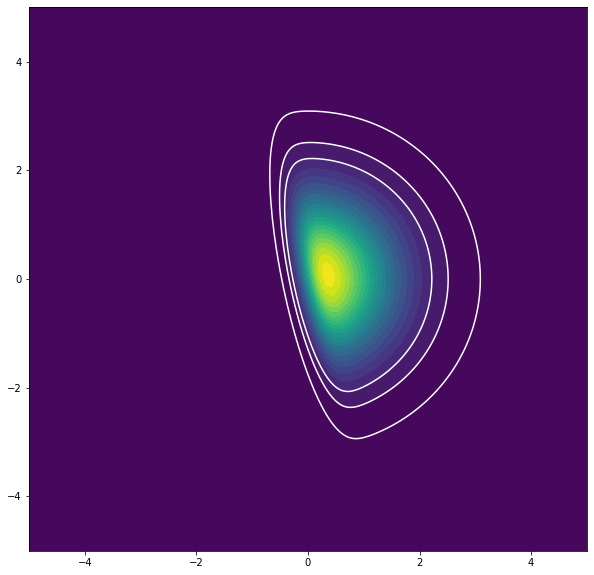

In [5]:
plt.figure(figsize = (10, 10))
plt.contourf(X,Y,Z, 25)
cs=plt.contour(X,Y,Z, t_contours, colors="white")
plt.show()

In [6]:
pp = cs.collections[1].get_paths()[0].to_polygons()[0]

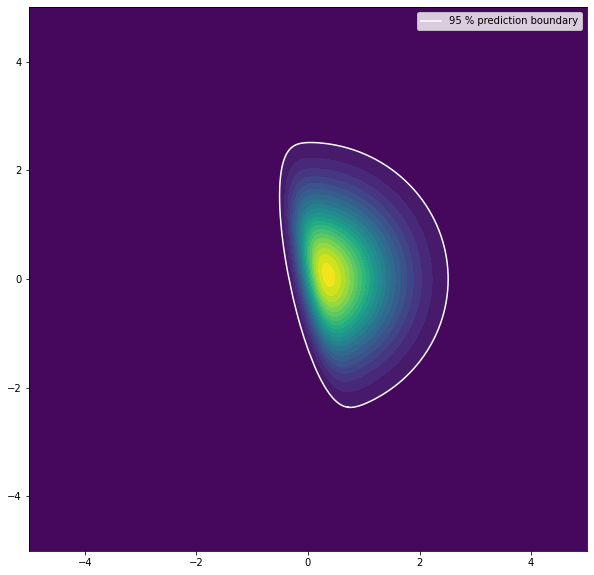

In [7]:
plt.figure(figsize = (10, 10))
plt.contourf(X,Y,Z,25)
plt.plot(pp[:,0],pp[:,1], color="white", label = "95 % prediction boundary")
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.legend()
plt.show()

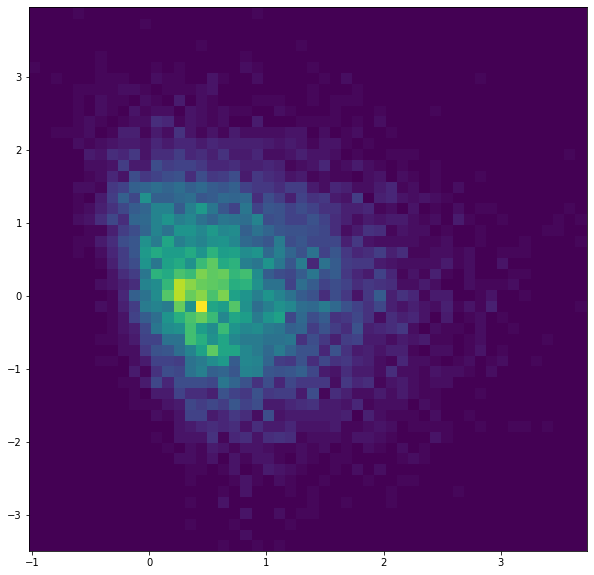

In [16]:
r = MV_SkewNorm(a=a).rvs(10000)

plt.figure(figsize = (10, 10))
plt.hist2d(r[:,0], r[:,1], bins=50)
plt.show()